<a href="https://colab.research.google.com/github/justinbkeeler/2023-NAA-Student/blob/main/23-0712%20-%20WED%20-%20Supervised%20Machine%20Learning/Practice%20%26%20Apply%20It!/2023_NAA_Camp_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

**Author: Justin B. Keeler, PhD**  
**Date: July 2023**  
*Affiliations: Texas Christian University & Wichita State University*

<font color='red'>Disclaimer: The information contained in this document is confidential and proprietary to the author. It is intended solely for the use of the individual or entity to whom it is addressed. Unauthorized distribution, dissemination or copying of this document or the information herein is strictly prohibited without prior written consent from the author.</font>

</center>

# **Part 1** - Importing Data and Initial KNN

In [ ]:
import pandas as pd

In [ ]:
#import data from github repo
url1 = "https://raw.githubusercontent.com/justinbkeeler/2023-NAA-Student/main/23-0712%20-%20WED%20-%20Supervised%20Machine%20Learning/Practice%20%26%20Apply%20It!/fruit.csv"
url2 = "https://raw.githubusercontent.com/justinbkeeler/2023-NAA-Student/main/23-0712%20-%20WED%20-%20Supervised%20Machine%20Learning/Practice%20%26%20Apply%20It!/fruit_ex.csv"

In [ ]:
fruits = pd.read_csv(url2)

In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,weight,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
X = fruits[['weight', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


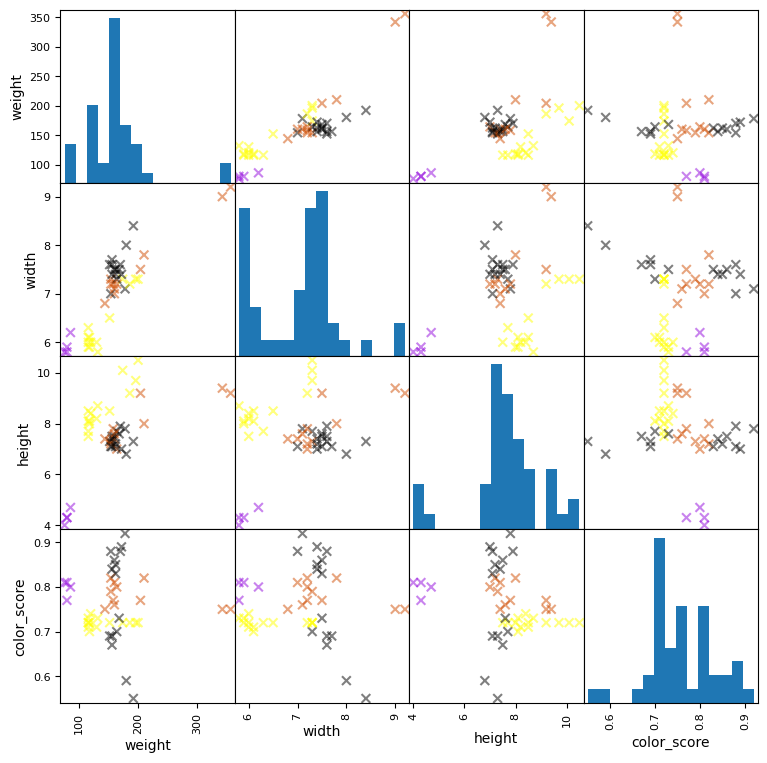

In [ ]:
%matplotlib inline
import matplotlib
from matplotlib import cm
from pandas.plotting import scatter_matrix

cmap = matplotlib.colormaps['gnuplot']
cmap = matplotlib.colormaps.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c=y_train, marker='x', s=40, hist_kwds={'bins': 15}, figsize=(9, 9), cmap=cmap, edgecolor='black')

# Save the plot as a PNG image file
plt.savefig('scatter_matrix1.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
X = fruits[['weight', 'width', 'height']]
y = fruits['fruit_label']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #default train/test is 75%/25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_u = KNeighborsClassifier(n_neighbors = 1)
knn_u.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_u.score(X_test,y_test)
print(f'KNN Score or Accuracy: {knn_u.score(X_test,y_test):.3f}')

KNN Score or Accuracy: 0.667


<font color='red'>The following code is to turn off depreciated messages that do not impact the analyses</font>

In [ ]:
import logging
import warnings

# Configure logging to capture the warning message
logging.captureWarnings(True)
log_file = 'warning_log.txt'  # Specify the log file path

# Create a logger and set the log level to capture warnings
logger = logging.getLogger('sklearn_warnings')
logger.setLevel(logging.WARNING)

# Add a file handler to save the warning messages to the log file
handler = logging.FileHandler(log_file)
logger.addHandler(handler)

# Temporarily filter out the warning message
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Stop capturing warnings and remove the file handler
logging.captureWarnings(False)
logger.removeHandler(handler)


In [ ]:
fruit_prediction = knn_u.predict([[25, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [ ]:
fruit_prediction = knn_u.predict([[180, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

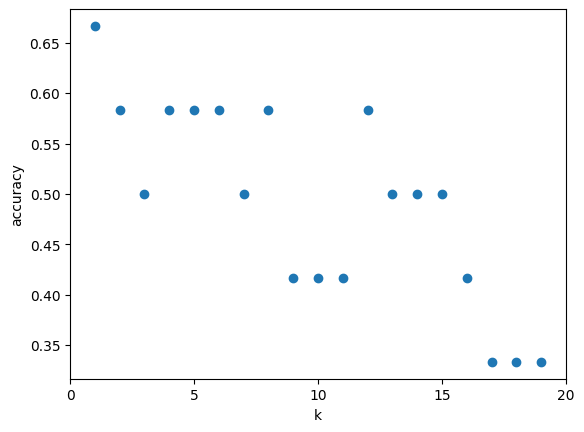

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20])

plt.show()

## <font color='turquoise'>Train/Test Split Evaluation</font>

In [ ]:
# Train the model and compute the training score
knn_u.fit(X_train, y_train)
training_score_u = knn_u.score(X_train, y_train)

# Compute the test score
test_score_u = knn_u.score(X_test, y_test)

# Print the scores
print(f'Training score: {training_score_u:.3f}')
print(f'Test score:     {test_score_u:.3f}')

Training score: 1.000
Test score:     0.667


INTERPRETATION: A training score of 1.000 indicates that your model has perfectly fit the training data, meaning it can accurately predict the outcomes for all instances in your training set.

A test score of 0.667 suggests that the same model, when applied to unseen test data, correctly predicts the outcome only about 67% of the time.

When your training score is perfect (or near-perfect), but your test score is significantly lower, it's a common sign of overfitting. The model is likely capturing noise or random fluctuations in the training data, which doesn't generalize well to unseen data.

Overfitting means your model has become too complex and is fitting the noise or exceptions in the training data rather than capturing the underlying trend or pattern. This limits its ability to make correct predictions on new, unseen data.

To address overfitting, you can:

    Collect more training data.
    Reduce the complexity of the model.
    Use regularization methods.
    Apply cross-validation for a more robust estimate of model performance.
    Tune hyperparameters using grid search or randomized search.
    Implement early stopping (in gradient boosting algorithms and deep learning).
    Use ensemble methods to improve model performance.

## <font color='turquoise'>Accuracy (before GridSearchCV tuning)</font>

#**Part 2** - Standardizing Features of Model

In Part 1, we did not standardize or normalize the data. The concern when this is not performed is FEATURES that are on large scales can have a larger impact on the distance between observations.

A good practice is to standardize (mean = 0, standard deviation = 1) or normalize (min = 0, max = 1) the data before using KNN.

In [ ]:
fruits = pd.read_csv(url2)

In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,weight,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = knn_u.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(format(accuracy, '.3f'))

0.667


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler #New library

In [ ]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
X = fruits[['weight', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)  # adjust test_size as needed #random_state = seed value

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler instance and standardize the training set
X_train = scaler.fit_transform(X_train)

# Use the same StandardScaler instance to standardize the test set
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_s = KNeighborsClassifier(n_neighbors = 2)

# Fit the KNN model using the standardized training set
knn_s.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Predict labels for the test set
y_pred = knn_s.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.83


<ipython-input-26-41bacfeea4fd>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


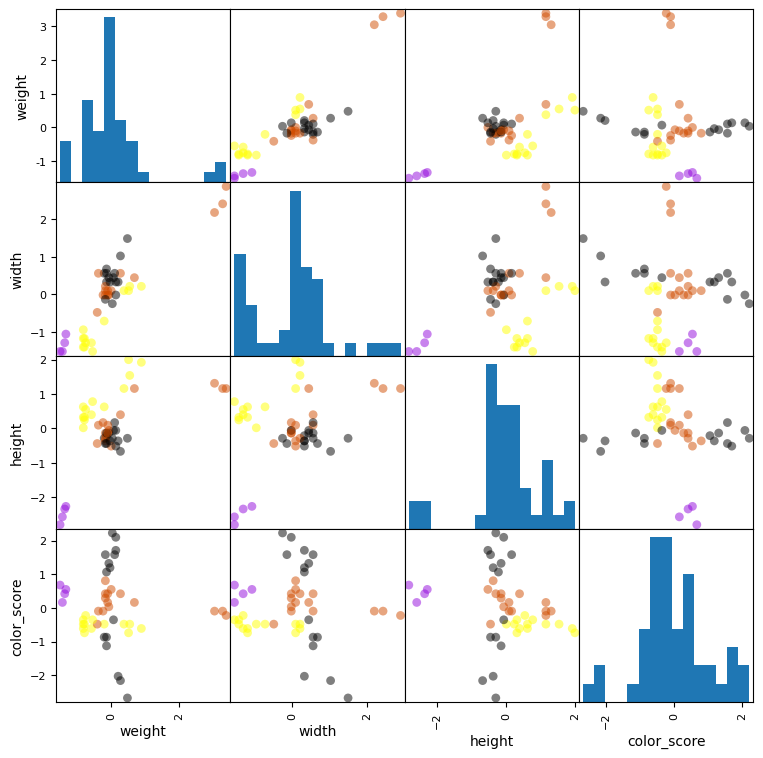

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.plotting import scatter_matrix
import pandas as pd

# convert numpy array back to dataframe
df_X_train = pd.DataFrame(X_train, columns=X.columns)

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(df_X_train, c=y_train, marker='o', s=40, hist_kwds={'bins': 15}, figsize=(9, 9), cmap=cmap)

# Save the plot as a PNG image file
plt.savefig('scatter_matrix2.png', dpi=300, bbox_inches='tight')
plt.show()


<font color='blue'>Testing the model and standardizing the data for prediction</font>


In [ ]:
# New data point 1  | X = fruits[['weight', 'width', 'height', 'color_score']]
new_data1 = [[192, 8.4, 7.3, 0.55]]

# Standardize the new data point using the same scaler
new_data1_std = scaler.transform(new_data1)

# Predict the label for the new data point
fruit_prediction = knn_s.predict(new_data1_std)

# Lookup the predicted fruit's name
lookup_fruit_name[int(fruit_prediction[0])]

'apple'

In [ ]:
# New data point 2  | X = fruits[['weight', 'width', 'height', 'color_score']]
new_data2 = [[118, 6.1, 8.1, 0.7]]

# Standardize the new data point using the same scaler
new_data2_std = scaler.transform(new_data2)

# Predict the label for the new data point
fruit_prediction = knn_s.predict(new_data2_std)

# Lookup the predicted fruit's name
lookup_fruit_name[(fruit_prediction[0])]

'lemon'

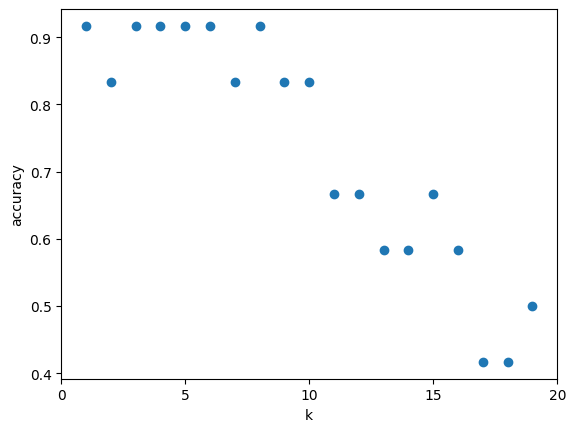

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20])

plt.show()

## <font color='orange'>Train/Test Split Evaluation</font>

In [ ]:
# Train the model and compute the training score
knn_s.fit(X_train, y_train)
training_score_s = knn_s.score(X_train, y_train)

# Compute the test score
test_score_s = knn_s.score(X_test, y_test)

# Print the scores
print(f'Training score: {training_score_s:.3f}')
print(f'Test score:     {test_score_s:.3f}')

Training score: 0.979
Test score:     0.833


INTERPRETATION: A training score of 0.979 means the model can predict the outcome for about 98% of the instances in the training set correctly. A test score of 0.833 means the model correctly predicts the outcome for about 83% of the instances in the test set.

This smaller gap suggests that the model might be generalizing better to unseen data, which is ultimately the goal of any machine learning model. A model that performs slightly worse on the training set but better on the test set can often be a more useful model, because it indicates less overfitting.

However, the perfect training score (1.000) being higher than the test score (0.917) could suggest a slight overfitting. It's not as pronounced as in the previous scenario (1.000 and 0.667), but it's still there.

However, the specific scores that are considered "good" or "acceptable" will vary depending on your application and the standards of your field. For example, in some fields, an accuracy of 83% might be excellent, but in other fields, it might not be acceptable.

#**Part 3** - Model Performance Assessment

## Cross-Validation

<font color='turquoise'>Analysis based on ***unstandardized*** FEATURES and knn model that has nearest neighbors of a value = 1</font>

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(knn_u, X, y, cv=5)  # 5-fold cross validation

for score in cross_val_scores:
    print(format(score, '.3f'))

print("Average cross-validation score: {:.3f}".format(cross_val_scores.mean()))

0.333
0.583
0.500
0.750
0.727
Average cross-validation score: 0.579


INTERPRETATION: This set of cross-validation scores (.333, .583, .500, .75, .727) averages to roughly 0.579. This means that on average, the model is correctly predicting about 58% of the instances in the test sets. This performance might be considered poor for many tasks, especially in comparison to the standardized set of scores below.

<font color='orange'>Analysis based on ***standardized*** FEATURES and knn model that has nearest neighbors of a value = 1</font>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler instance and standardize the entire dataset
X_std = scaler.fit_transform(X)

# Perform 5-fold cross validation
cross_val_scores = cross_val_score(knn_s, X_std, y, cv=5)

for score in cross_val_scores:
    print(format(score, '.3f'))

print("Average cross-validation score: {:.3f}".format(cross_val_scores.mean()))


1.000
0.917
0.833
1.000
1.000
Average cross-validation score: 0.950


INTERPRETATION: This set of cross-validation scores (.917, 1.000, .833, 1.000, 1.000) averages to roughly 0.95, indicating the model correctly predicted about 95% of the instances in the test sets on average. This is a significantly better performance than the first model.

## Hyperparameter Tuning via Grid Search

Grid Search in scikit-learn doesn't directly tell you which predictors or features are most important for model accuracy. Think of this as an optimization technique that helps you determine the best hyperparameters for your model (i.e., parameters that are not learned directly from the data and need to be set before training), like the number of neighbors in a K-nearest neighbors model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a StandardScaler instance
scaler = StandardScaler()

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a pipeline
pipe = Pipeline(steps=[('scaler', scaler), ('knn', knn)])

# Specify the hyperparameters and their values
param_grid = {
    'knn__n_neighbors': [1, 2, 3, 4, 5],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Print the best score
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}
Best Score:  0.95


## <font color='orange'>Accuracy (after GridSearchCV tuning)</font>

In [ ]:
import inspect
from sklearn.neighbors import KNeighborsClassifier
print(inspect.signature(KNeighborsClassifier))

(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler #New library

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)  # adjust test_size as needed #random_state = seed value

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler instance and standardize the training set
X_train = scaler.fit_transform(X_train)

# Use the same StandardScaler instance to standardize the test set
X_test = scaler.transform(X_test)

# ***UPDATE THE KNN CLASSIFIER WITH GRID SEARCH PARAMETER RECOMMENDATIONS***
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='uniform')

# Fit the KNN model using the standardized training set
knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

#print(format(accuracy, '.2f'))
print(f'Accuracy after applying hyperparameter tuning: {accuracy:.3f}')

Accuracy after applying hyperparameter tuning: 0.917
